In [1]:
from functions import *
from UNET import *

In [2]:
dataset_path = "./Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
numpy_path = "./augmented_dataset"
torch.manual_seed(8524011162127527122)
np.random.seed(123456789)

*** Uncomment below to generate dataset ***

In [3]:
# generate_dataset(dataset_path, numpy_path, (240,240,40))


In [4]:
dataset = load_dataset(numpy_path)

./augmented_dataset


In [5]:
training_set, validation_set, testing_set = random_split(dataset, (0.8, 0.1, 0.1))
print(len(training_set), len(validation_set), len(testing_set))
print(training_set[0].shape, validation_set[0].shape, testing_set[0].shape)

1477 184 184
(5, 16, 240, 240) (5, 16, 240, 240) (5, 16, 240, 240)


In [6]:
processed_training_set = split_layers(np.array(training_set))
processed_validation_set = split_layers(np.array(validation_set))
processed_testing_set = split_layers(np.array(testing_set))

In [7]:
print(processed_training_set.shape, processed_validation_set.shape, processed_testing_set.shape)

(23632, 5, 240, 240) (2944, 5, 240, 240) (2944, 5, 240, 240)


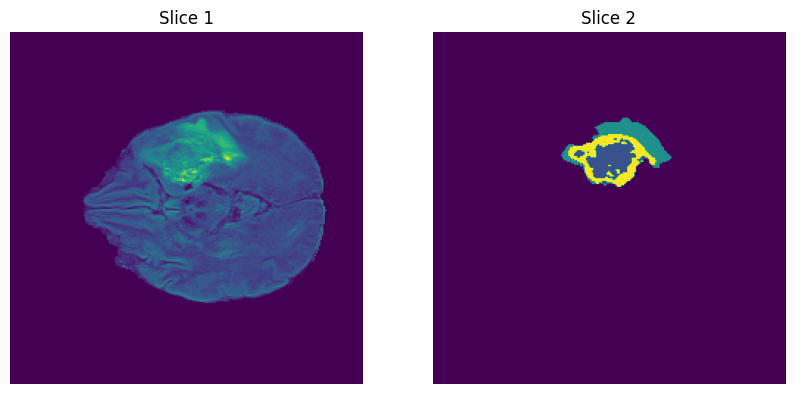

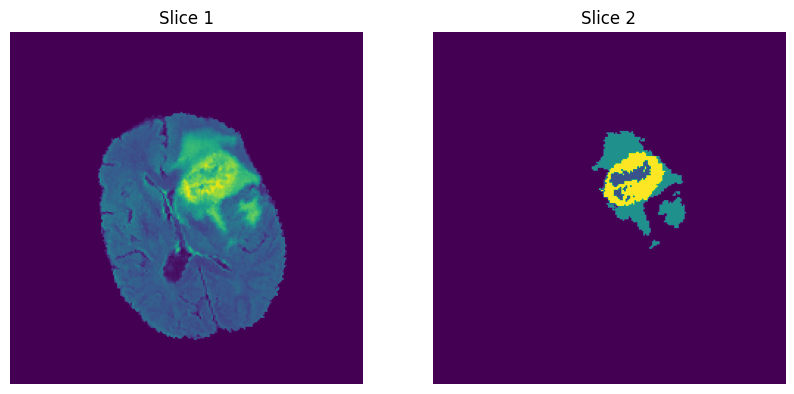

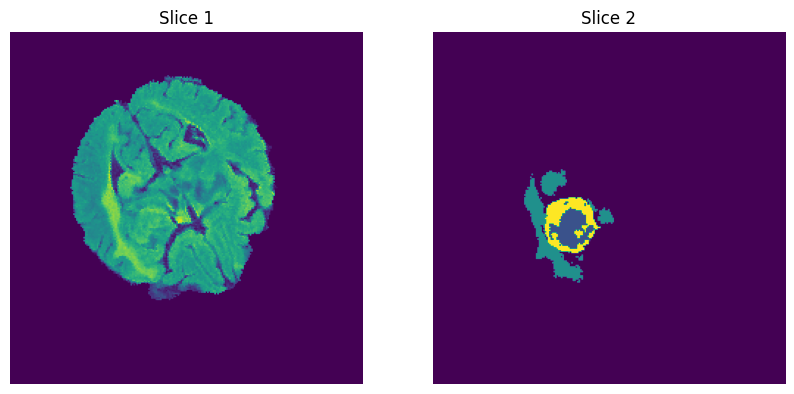

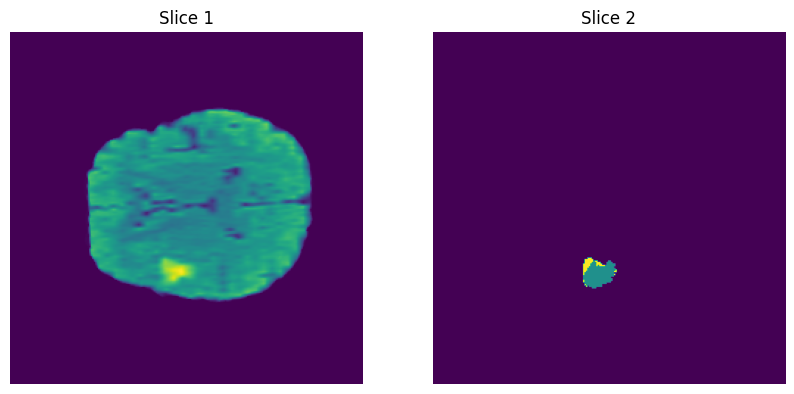

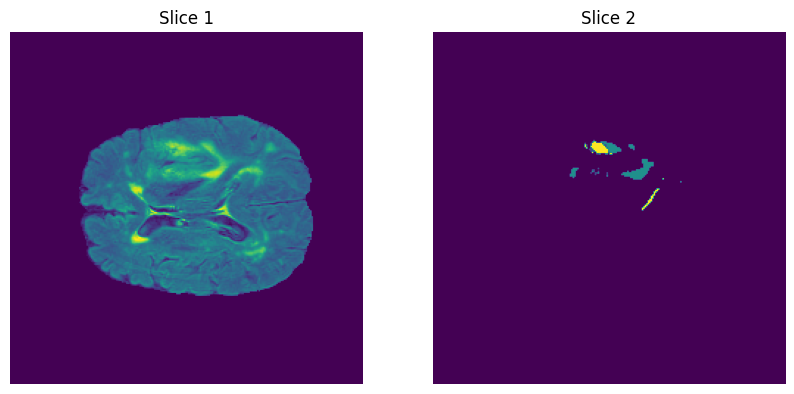

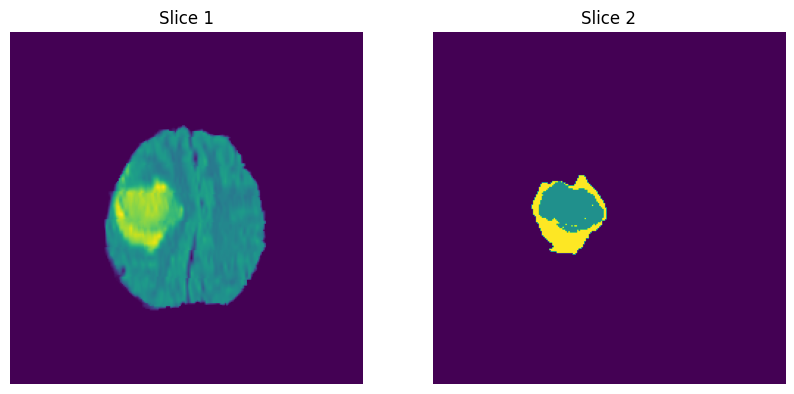

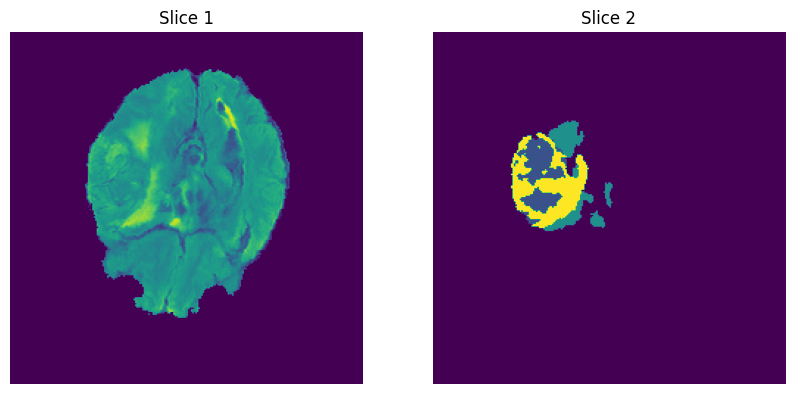

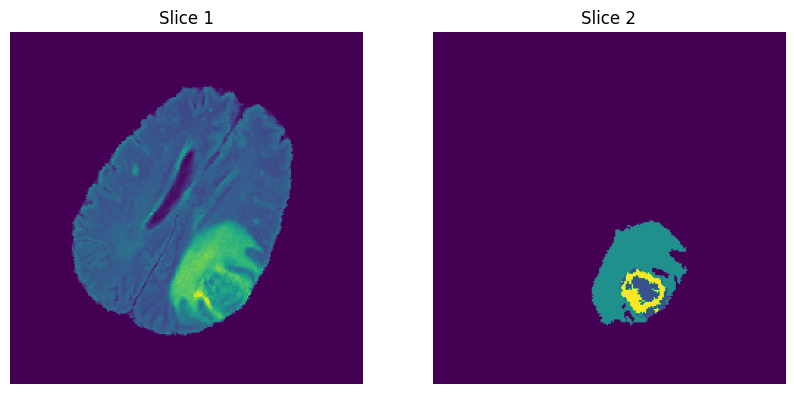

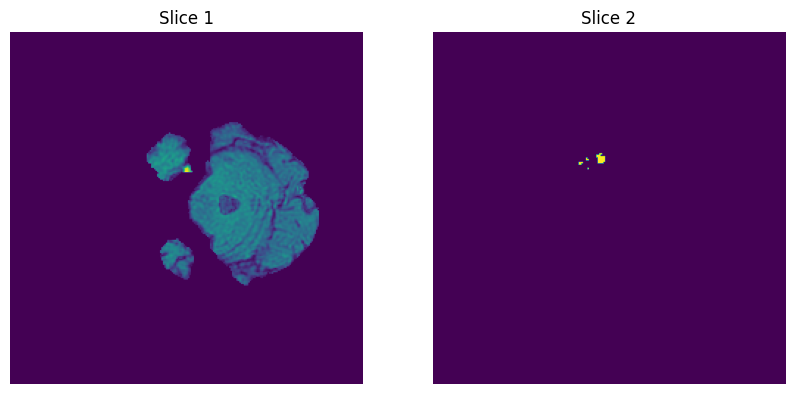

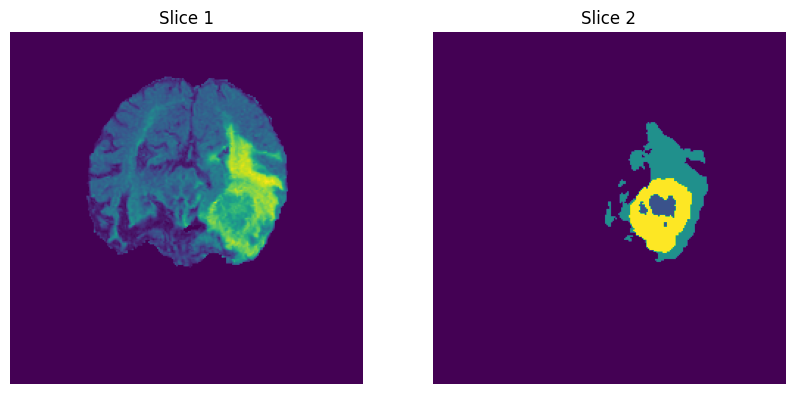

In [8]:
# visualise dataset
counter = 0
for slice in processed_training_set:
    if slice[1].max() != 0:
        counter += 1
        if counter % 10 == 0:
            display_slice(slice[0], slice[1], 'Slice 1', 'Slice 2')
        if counter == 100:
            break

In [9]:
training_custom_set = CustomDataset(processed_training_set)
validation_custom_set = CustomDataset(processed_validation_set)
testing_custom_set = CustomDataset(processed_testing_set)

batch_size = 20

training_dataloader = DataLoader(training_custom_set, batch_size = batch_size, shuffle=True)
validation_dataloader = DataLoader(validation_custom_set, batch_size = batch_size, shuffle=True)
testing_dataloader = DataLoader(testing_custom_set, batch_size = batch_size ,shuffle=True)

In [10]:
print(next(iter(training_dataloader))[0].shape, next(iter(training_dataloader))[1].shape)

torch.Size([20, 4, 240, 240]) torch.Size([20, 1, 240, 240])


In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
model = UNet().to(device)
loss1 = dice_loss
loss2 = nn.BCEWithLogitsLoss()
epochs = 2

def combined_loss(y_pred, y_true):
    output = loss1(y_pred, y_true) + loss2(y_pred, y_true)
    return output

loss3 = combined_loss
optim = torch.optim.Adam(model.parameters(), lr=0.001)
feature_range = (1, 2)

```
Model Variations and testing
```

```
Model 1
```

In [12]:
# train_loss_dice, val_loss_dice = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                    optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss1, display_batch_loss=True, 
#                                    save_folder="Dice_Loss", epochs = epochs)

In [13]:
# plot_two_lines_same_x(train_loss_dice, val_loss_dice)

```
Model 2
```

In [14]:
# train_loss_BCE, val_loss_BCE = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                            optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss2, 
#                                            display_batch_loss=True, save_folder="BCE_Loss", epochs=epochs)

In [15]:
# plot_two_lines_same_x(train_loss_BCE, val_loss_BCE)

```
Model 3
```

In [16]:
# Uncomment to train
# train_loss_Combined, val_loss_Combined = train_model(model, train_dataloader=training_dataloader, val_dataloader=validation_dataloader, 
#                                                      optimizer=optim,feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                      display_batch_loss=True, save_folder="Combined_loss", epochs=epochs)

In [17]:
# plot_two_lines_same_x(train_loss_Combined, val_loss_Combined)

In [18]:
model1 = torch.load("./saved_models/Dice_Loss/model_2.pth").to(device)
model2 = torch.load("./saved_models/BCE_Loss/model_2.pth").to(device)
model3 = torch.load("./saved_models/Combined_loss/model_2.pth").to(device)
pred1, pred2, pred3, outputs = visualize_model_single_channels(model1, model2, model3, testing_dataloader, device, feature_range = (1,2), number_gen = 20)

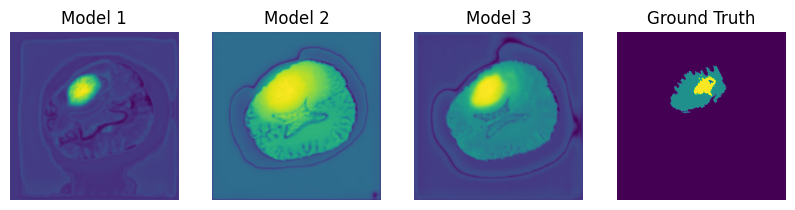

In [19]:
index = 10
display_4_slice(pred1[index][0][0], pred2[index][0][0], pred3[index][0][0], outputs[index][0][0], tag1 = 'Model 1', tag2 = 'Model 2', tag3 = 'Model 3', tag4 = 'Ground Truth')

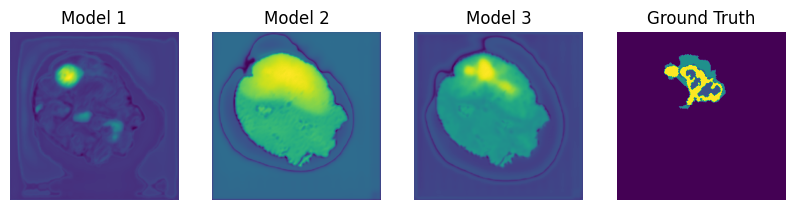

In [20]:
index = 18
display_4_slice(pred1[index][0][0], pred2[index][0][0], pred3[index][0][0], outputs[index][0][0], tag1 = 'Model 1', tag2 = 'Model 2', tag3 = 'Model 3', tag4 = 'Ground Truth')

In [21]:
model_multi_channel = UNet(in_channels=4).to(device)
optim_multi_channel = torch.optim.Adam(model_multi_channel.parameters(), lr=0.001)
feature_range = (0,4)


```
Model 4
```


In [22]:
# train_loss_multi_combined_0001, val_loss_multi_combined_0001 = train_model(model_multi_channel, train_dataloader=training_dataloader, 
#                                                                            val_dataloader=validation_dataloader, optimizer=optim_multi_channel,
#                                                                            feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                                            display_batch_loss=True, save_folder="multi_channel_combined_lr0001", 
#                                                                            epochs = epochs)

In [23]:
# plot_two_lines_same_x(train_loss_multi_combined_0001, val_loss_multi_combined_0001) 

```
Model 5
```

In [24]:
model_multi_channel = UNet(in_channels=4).to(device)
optim_multi_channel = torch.optim.Adam(model_multi_channel.parameters(), lr=0.01)

In [25]:
# train_loss_multi_combined_001, val_loss_multi_combined_001 = train_model(model_multi_channel, train_dataloader=training_dataloader, 
#                                                                          val_dataloader=validation_dataloader, optimizer=optim_multi_channel,
#                                                                          feature_range=feature_range, device = device, loss_fn = loss3, 
#                                                                          display_batch_loss=True, save_folder="multi_channel_combined_lr001",
#                                                                          epochs = epochs)

In [26]:
# plot_two_lines_same_x(train_loss_multi_combined_001, val_loss_multi_combined_001)

```
Model 6
```

In [27]:
model_multi_channel_main = UNet(in_channels=4).to(device)
optim_multi_channel_main = torch.optim.Adam(model_multi_channel_main.parameters(), lr=0.001)
epochs = 5

In [28]:
# train_loss_multi_main, val_loss_multi_main = train_model(model_multi_channel_main, train_dataloader=training_dataloader, 
#                                                          val_dataloader=validation_dataloader, optimizer=optim_multi_channel_main,
#                                                          feature_range=feature_range, device = device, loss_fn = loss3, display_batch_loss=True, 
#                                                          save_folder="multi_channel_main", epochs=epochs)

In [29]:
# plot_two_lines_same_x(train_loss_multi_main, val_loss_multi_main)

```
Model 7
```

In [30]:
model_multi_channel_further = torch.load("./saved_models/multi_channel_main/model_5.pth").to(device)
optim_multi_channel_further = torch.optim.Adam(model_multi_channel_main.parameters(), lr=0.001)
epochs = 5

In [31]:
# train_loss_multi_further, val_loss_multi_further = train_model(model_multi_channel_further, train_dataloader=training_dataloader, 
#                                                          val_dataloader=validation_dataloader, optimizer=optim_multi_channel_further,
#                                                          feature_range=feature_range, device = device, loss_fn = loss3, display_batch_loss=True, 
#                                                          save_folder="multi_channel_further", epochs=epochs)

In [32]:
# plot_two_lines_same_x(train_loss_multi_further, val_loss_multi_further)

In [37]:
model = torch.load("./saved_models/multi_channel_further/model_5.pth").to(device)
avg_loss, preds, actuals = test_model(model, testing_dataloader, device, loss3)

0/148
10/148
20/148
30/148
40/148
50/148
60/148
70/148
80/148
90/148
100/148
110/148
120/148
130/148
140/148


In [38]:
print(avg_loss)

0.3432874


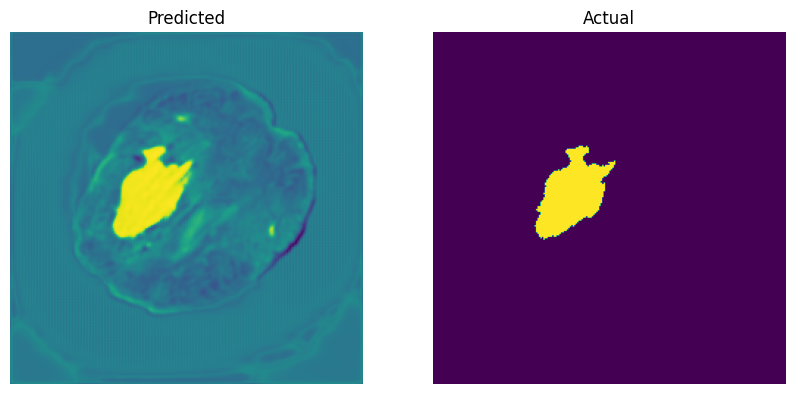

In [35]:
index = 12

display_slice(preds[index][0], actuals[index][0], tag1 = 'Predicted', tag2 = 'Actual')

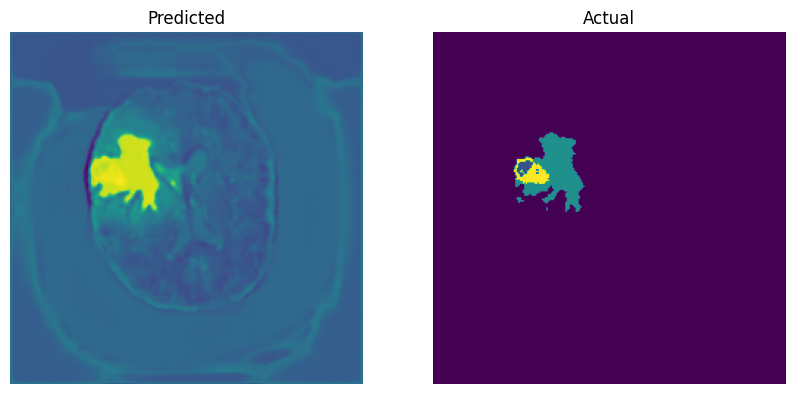

In [36]:
index = 15

display_slice(preds[index][0], actuals[index][0], tag1 = 'Predicted', tag2 = 'Actual')